### Область работы 1 (библиотеки)

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,make_scorer,precision_recall_curve,fbeta_score
from sklearn.model_selection import train_test_split,TunedThresholdClassifierCV,ValidationCurveDisplay,KFold,ShuffleSplit,validation_curve,FixedThresholdClassifier,GridSearchCV,cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,StackingClassifier,VotingClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,balanced_accuracy_score,roc_curve,roc_auc_score,accuracy_score, log_loss, zero_one_loss
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Область работы 2 (поиск  модели .... )

In [2]:
path_train = 'train.csv'
data = pd.read_csv(path_train)
y=pd.read_csv('train_Y.csv')

In [3]:
df=data.join(y)

In [158]:
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,4.0,5.0,2.0,0.0,0.0,6.0,6.0,3.0,1.0
1,1.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,15.0,15.0,0.0,0.0,10.0,4.0,5.0,1.0
2,1.0,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,30.0,30.0,0.0,0.0,4.0,5.0,1.0,1.0
3,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,7.0,1.0
4,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,3.0,0.0,2.0,0.0,0.0,5.0,4.0,5.0,1.0


In [81]:
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.00000,...,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000
mean,0.569496,0.527717,0.975396,29.934604,0.480205,0.063893,0.150908,0.697153,0.606102,0.78550,...,0.095732,2.854588,3.795247,5.885289,0.256602,0.457147,8.601979,4.908304,5.668749,0.505968
std,0.495152,0.499237,0.154916,7.168650,0.499613,0.244565,0.357963,0.459494,0.488618,0.41048,...,0.294226,1.108264,8.199532,10.100270,0.436762,0.498166,2.853608,1.027933,2.174496,0.499970
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,1.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,...,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47363 entries, 0 to 47362
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                47363 non-null  float64
 1   HighChol              47363 non-null  float64
 2   CholCheck             47363 non-null  float64
 3   BMI                   47363 non-null  float64
 4   Smoker                47363 non-null  float64
 5   Stroke                47363 non-null  float64
 6   HeartDiseaseorAttack  47363 non-null  float64
 7   PhysActivity          47363 non-null  float64
 8   Fruits                47363 non-null  float64
 9   Veggies               47363 non-null  float64
 10  HvyAlcoholConsump     47363 non-null  float64
 11  AnyHealthcare         47363 non-null  float64
 12  NoDocbcCost           47363 non-null  float64
 13  GenHlth               47363 non-null  float64
 14  MentHlth              47363 non-null  float64
 15  PhysHlth           

In [6]:
df.isna().any(axis=1).sum()

0

In [8]:
df.duplicated().sum()


785

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
X=df.drop('Diabetes_binary',axis=1)
y=df['Diabetes_binary']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y)

In [12]:
y_train.value_counts()

Diabetes_binary
1.0    17675
0.0    17258
Name: count, dtype: int64

#### Random Forest

In [133]:
model_RF = make_pipeline(StandardScaler(),
                         
                         RandomForestClassifier(n_estimators = 1000, 
                                                max_features='sqrt',
                                                min_samples_leaf=5,
                                                oob_score=True
                                                
                                                #n_jobs=-1
                                               ))
model_RF.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=5, n_estimators=1000,
                                        oob_score=True))])

In [134]:
y_pred_RF=model_RF.predict(X_test)

In [135]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      5753
         1.0       0.73      0.79      0.76      5892

    accuracy                           0.75     11645
   macro avg       0.75      0.75      0.75     11645
weighted avg       0.75      0.75      0.75     11645



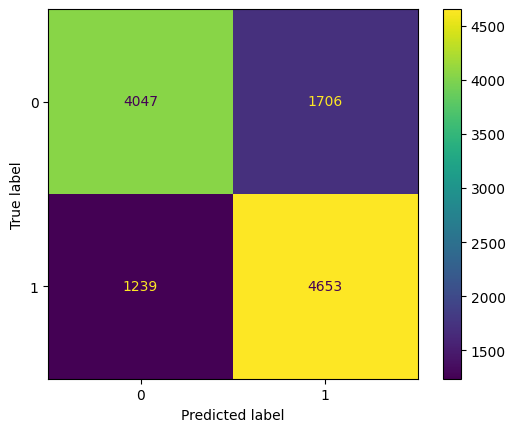

In [136]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_RF)).plot()

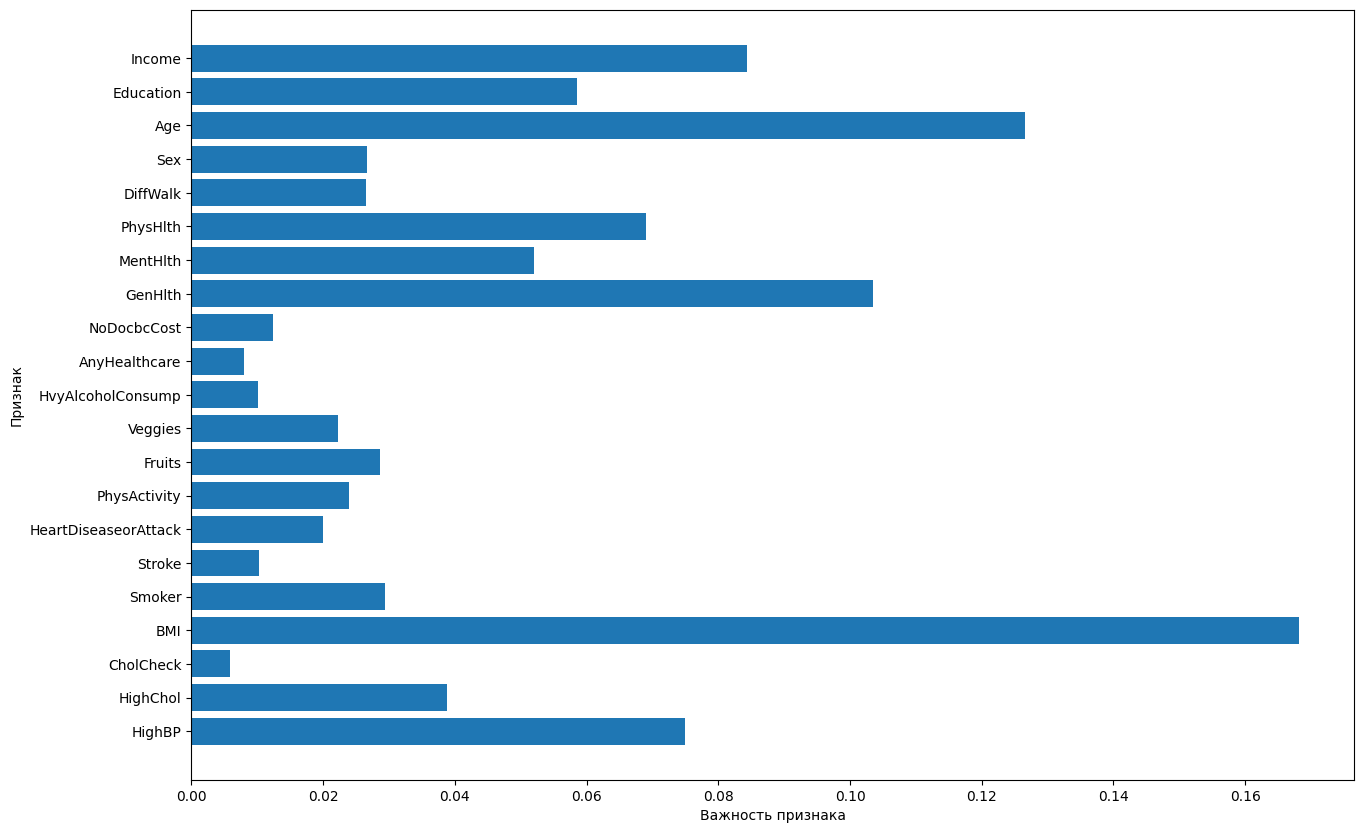

In [90]:
def plot_feature_importances_cancer(model):
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data.columns) 
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plt.figure(figsize = (15, 10))
plot_feature_importances_cancer(model_RF.named_steps['randomforestclassifier'])


Согласно рисунку, больше всего на уровень диабета влияют BMI,GenHealth и Age

##### Поскольку, согласно заданию, доля ошибочно-негативных ответов модели должна штрафоваться в два раза больше чем доля ошибочно-положительных ответов, то
##### используем метрику fbeta score с параметром beta равным корень из двух

In [120]:
beta=np.sqrt(2)
fb=make_scorer(fbeta_score,beta=beta)


Очевидно,чтобы уменьшить долю ошибочно-негативных ответов, нужно понизить порог принятия решений модели

In [181]:
classifier_tuned = TunedThresholdClassifierCV(
    model_RF, scoring=fb,cv=KFold(n_splits=50)
).fit(X_train, y_train)

In [182]:
print(
    f"Оптимальный порог: {classifier_tuned.best_threshold_:.3f}"
)

Оптимальный порог: 0.317


In [183]:
rf_finished=FixedThresholdClassifier(model_RF,threshold=0.317,response_method='predict_proba').fit(X_train,y_train)

In [184]:
y_pred_tuned_RF=rf_finished.predict(X_test)

In [185]:
print(classification_report(y_test,y_pred_tuned_RF))

              precision    recall  f1-score   support

         0.0       0.88      0.50      0.64      5753
         1.0       0.66      0.93      0.77      5892

    accuracy                           0.72     11645
   macro avg       0.77      0.72      0.70     11645
weighted avg       0.76      0.72      0.70     11645



In [186]:
fbeta_score(y_test,y_pred_tuned_RF,beta=np.sqrt(2))

0.816719618745036

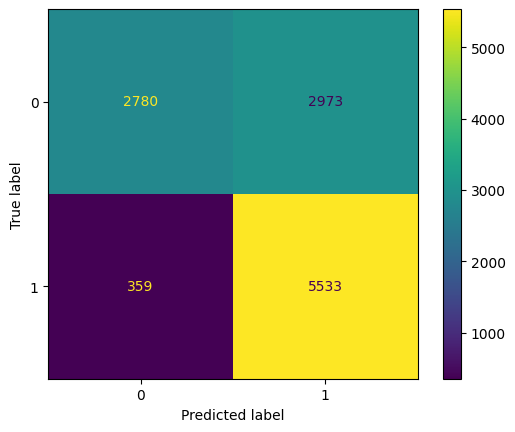

In [127]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_tuned_RF)).plot()

In [145]:
print('Правильность на тестовом наборе{: .3f}'.format(rf_finished.score(X_test,y_test)))

Правильность на тестовом наборе 0.714


In [146]:
print('Правильность на тренировочном наборе{: .3f}'.format(rf_finished.score(X_train,y_train)))

Правильность на тренировочном наборе 0.751


модель не переобучилась на тренировочных данных, что есть гуд:)

In [147]:
scores_rf = cross_val_score(
    rf_finished, X_train, y_train, cv=ShuffleSplit(n_splits=50, test_size=0.3), scoring=fb)
print("%0.2f fbeta_score with a standard deviation of %0.2f" % (scores_rf.mean(), scores_rf.std()))

0.81 fbeta_score with a standard deviation of 0.00


#### GradientBoosting

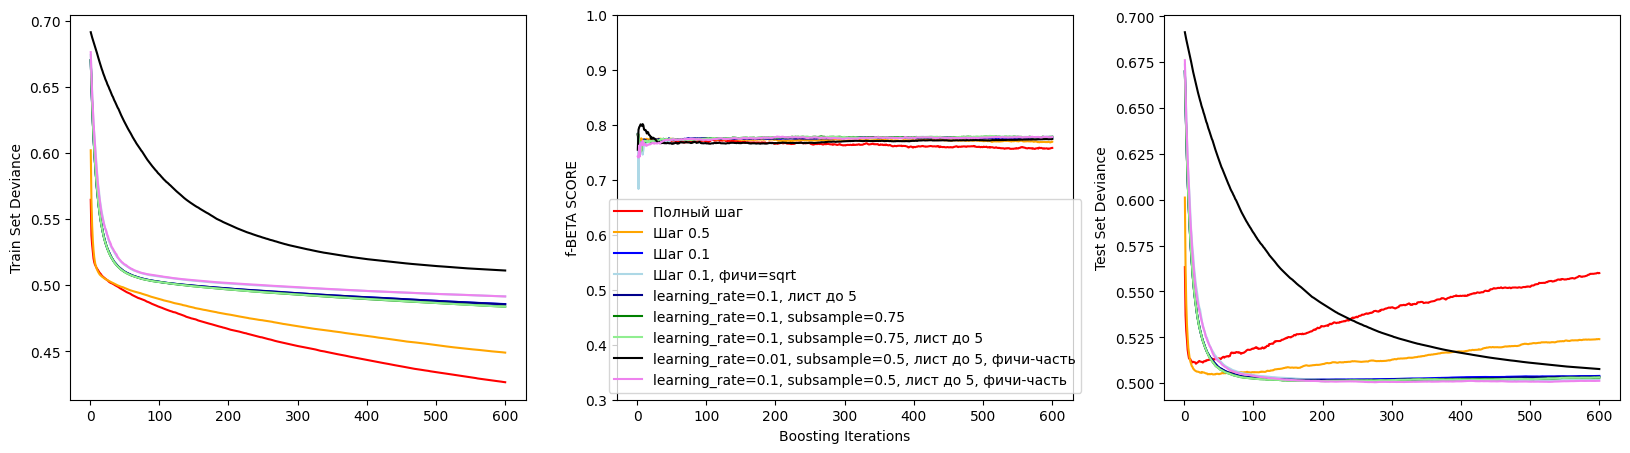

In [149]:
labels, y = np.unique(y, return_inverse=True)


original_params = {
    "n_estimators": 600,
    #"max_leaf_nodes": None,
    #"max_depth": None,
    "random_state": 42,
    'criterion': 'friedman_mse'
    
}

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

for label, color, setting in [
    ("Полный шаг", "red", {"learning_rate": 1.0, "subsample": 1.0}),
    ("Шаг 0.5", "orange", {"learning_rate": 0.5, "subsample": 1.0}),
    ("Шаг 0.1", "blue",   {"learning_rate": 0.1, "subsample": 1.0}),
    ("Шаг 0.1, фичи=sqrt",
              "lightblue", {"learning_rate": 0.1, "subsample": 1.0, "max_features": 'sqrt'},
    ),
    ("learning_rate=0.1, лист до 5",
               "darkblue", {"learning_rate": 0.1, "subsample": 1.0, "min_samples_split" : 5},
    ),
    ("learning_rate=0.1, subsample=0.75",
                  "green", {"learning_rate": 0.1, "subsample": 0.75},
    ),
    ("learning_rate=0.1, subsample=0.75, лист до 5",
             "lightgreen", {"learning_rate": 0.1, "subsample": 0.75, "min_samples_split" : 5},
    ),
    ("learning_rate=0.01, subsample=0.5, лист до 5, фичи-часть",
             "black", {"learning_rate": 0.01, "subsample": 0.5, "min_samples_split" : 5, "max_features": 'sqrt'},
    ),
     ("learning_rate=0.1, subsample=0.5, лист до 5, фичи-часть",
             "violet", {"learning_rate": 0.1, "subsample": 0.5, "min_samples_split" : 5, "max_features": 'sqrt'},
    )
]:
    params = dict(original_params)
    params.update(setting)
    clf = GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    
    train_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict_proba(X_train)):
        train_deviance[i] = log_loss(y_train, y_pred)
        
    ax1.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        "-",
        color=color,
        label=label,
    )

    test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict(X_test)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_score[i] = fbeta_score(y_test, y_pred,beta=np.sqrt(2))
        
    ax2.plot(
        (np.arange(test_score.shape[0]) + 1),
        test_score,
        "-",
        color=color,
        label=label,
    )
    
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict_proba(X_test)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = log_loss(y_test, y_pred)
    ax3.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        "-",
        color=color,
        label=label,
    )

ax2.legend(loc='lower center')
ax2.set_xlabel("Boosting Iterations")
ax2.set_ylim(0.3, 1.)
ax1.set_ylabel("Train Set Deviance")
ax2.set_ylabel("f-BETA SCORE")
ax3.set_ylabel("Test Set Deviance")

plt.show()

In [32]:
model_GB=make_pipeline(StandardScaler(),
                         GradientBoostingClassifier(n_estimators = 600, 
                                                learning_rate=0.01,
                                                    subsample=0.5,max_features='sqrt'
                                                    
                                               # n_jobs=-1
                                               ))
model_GB.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            max_features='sqrt',
                                            n_estimators=600, subsample=0.5))])

In [33]:
GB_pred=model_GB.predict(X_test)

In [34]:
print(classification_report(y_test,GB_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      5753
         1.0       0.74      0.79      0.76      5892

    accuracy                           0.75     11645
   macro avg       0.75      0.75      0.75     11645
weighted avg       0.75      0.75      0.75     11645



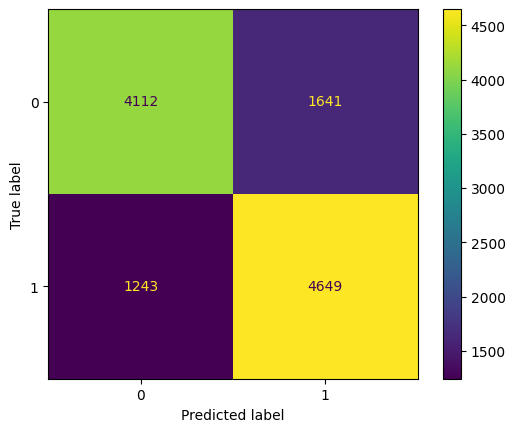

In [35]:
ConfusionMatrixDisplay(confusion_matrix(y_test,GB_pred)).plot()

In [175]:
classifier_tuned = TunedThresholdClassifierCV(
    model_GB, scoring=fb,cv=KFold(n_splits=100)
).fit(X_train, y_train)

In [176]:
print(
    f"Оптимальный порог: {classifier_tuned.best_threshold_:.3f}"
)

Оптимальный порог: 0.269


In [177]:
GB_finished=FixedThresholdClassifier(model_GB,threshold=0.269,response_method='predict_proba').fit(X_train,y_train)

In [178]:
y_tuned_GB=GB_finished.predict(X_test)

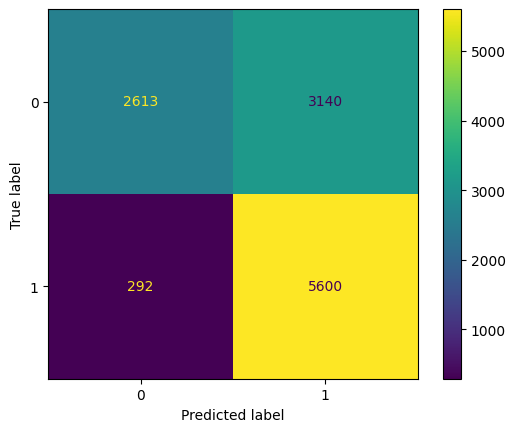

In [179]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_tuned_GB)).plot()

In [180]:
fbeta_score(y_test,y_tuned_GB,beta=np.sqrt(2))

0.8185538881309689

In [148]:
print('Правильность на тестовом наборе{: .3f}'.format(GB_finished.score(X_test,y_test)))

Правильность на тестовом наборе 0.702


In [149]:
print('Правильность на тренировочном наборе{: .3f}'.format(GB_finished.score(X_train,y_train)))

Правильность на тренировочном наборе 0.699


Посмотрим на устойчивость модели Градиентного бустинга

In [106]:
scores = cross_val_score(
    GB_finished, X_train, y_train, cv=ShuffleSplit(n_splits=50, test_size=0.3), scoring=fb)


In [107]:
print("%0.2f fbeta_score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.82 fbeta_score with a standard deviation of 0.00


#### Linear SVC

Использование Linear SVC более оптимально с точки зрения времени и памяти для большого объема данных, чем обычный SVC

In [44]:
model_SVC=make_pipeline(StandardScaler(),
                        LinearSVC(C=0.1))
model_SVC.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=0.1))])

In [198]:
svc_pred=model_SVC.predict(X_test)

In [199]:
fbeta_score(y_test,svc_pred,beta=np.sqrt(2))

0.7658544726301737

In [169]:
classifier_tuned_SVC = TunedThresholdClassifierCV(
    model_SVC, scoring=fb,cv=KFold(n_splits=100)
).fit(X_train, y_train)

In [170]:
print(
    f"Cut-off point found at {classifier_tuned_SVC.best_threshold_:.3f}"
)

Cut-off point found at -0.388


In [171]:
SVC_finished=FixedThresholdClassifier(model_SVC,threshold=-0.388,response_method='decision_function').fit(X_train,y_train)

In [172]:
y_pred_SVC=SVC_finished.predict(X_test)

In [173]:
fbeta_score(y_test,y_pred_SVC,beta=np.sqrt(2))

0.8200127407262215

In [108]:
scores_SVC = cross_val_score(
    GB_finished, X_train, y_train, cv=ShuffleSplit(n_splits=50, test_size=0.3), scoring=fb)

In [109]:
print("%0.2f fbeta_score with a standard deviation of %0.2f" % (scores_SVC.mean(), scores_SVC.std()))

0.82 fbeta_score with a standard deviation of 0.00


In [150]:
print('Правильность на тестовом наборе{: .3f}'.format(SVC_finished.score(X_test,y_test)))

Правильность на тестовом наборе 0.712


In [151]:
print('Правильность на тренировочном наборе{: .3f}'.format(SVC_finished.score(X_train,y_train)))

Правильность на тренировочном наборе 0.706


#### Посмотрим на результаты работы стэкинга и войтинга

In [51]:
estimators=[
    ('rfc',rf_finished),
    ('gb',GB_finished)
]
stack = StackingClassifier(estimators=estimators,final_estimator=SVC_finished)
stack.fit(X_train,y_train)

StackingClassifier(estimators=[('rfc',
                                FixedThresholdClassifier(estimator=Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler()),
                                                                                   ('randomforestclassifier',
                                                                                    RandomForestClassifier(n_estimators=1000))]),
                                                         response_method='predict_proba',
                                                         threshold=0.27)),
                               ('gb',
                                FixedThresholdClassifier(estimator=Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler()),
                                                                                   ('gradientbo...
                   final_estimator=FixedThresholdClassifier(estimator=TunedThresholdClassifierCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                                                                                                 estimator=Pipeline(steps=[('standardscaler',
                                                                                                                            StandardScaler()),
                                                                                                                           ('linearsvc',
                                                                                                                            LinearSVC(C=0.1))]),
                                                                                                 scoring=make_scorer(fbeta_score, response_method='predict', beta=1.4142135623730951)),
                                                            response_method='decision_function',
                                                            threshold=-0.383))

In [52]:
stack_pred=stack.predict(X_test)

In [53]:
fbeta_score(y_test,stack_pred,beta=np.sqrt(2))

0.8172527802825369

In [73]:
voit=VotingClassifier(estimators=[
    ('rf',rf_finished),
    ('gb',GB_finished),
    ('svc',SVC_finished),
   ,
],
    voting='hard',
    weights=[1,2,2])

In [74]:
voit.fit(X_train,y_train)


VotingClassifier(estimators=[('rf',
                              FixedThresholdClassifier(estimator=Pipeline(steps=[('standardscaler',
                                                                                  StandardScaler()),
                                                                                 ('randomforestclassifier',
                                                                                  RandomForestClassifier(n_estimators=1000))]),
                                                       response_method='predict_proba',
                                                       threshold=0.27)),
                             ('gb',
                              FixedThresholdClassifier(estimator=Pipeline(steps=[('standardscaler',
                                                                                  StandardScaler()),
                                                                                 ('gradientboost...
                              FixedThresholdClassifier(estimator=TunedThresholdClassifierCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                                                                                            estimator=Pipeline(steps=[('standardscaler',
                                                                                                                       StandardScaler()),
                                                                                                                      ('linearsvc',
                                                                                                                       LinearSVC(C=0.1))]),
                                                                                            scoring=make_scorer(fbeta_score, response_method='predict', beta=1.4142135623730951)),
                                                       response_method='decision_function',
                                                       threshold=-0.383))],
                 weights=[1, 2, 2])

In [75]:
voit_pred=voit.predict(X_test)

In [76]:
fbeta_score(y_test,voit_pred,beta=np.sqrt(2))

0.8185006576063132

В общем то, все рассмотренные модели показали одинаковые вполне результаты,выбрать одну итоговую довольно сложно, однако в силу своей производительности и относительно высокому fbeta, пусть итоговой буддет SVC